<a href="https://colab.research.google.com/github/Ayushi7877/Qualitative_Bankruptcy/blob/main/Qualitative_bankruptcy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/qualitative_bankruptcy dataset.csv')
df.columns=['IR','MR','FF','CR','CO','OP','Class']
print(df)

    IR MR FF CR CO OP Class
0    P  P  A  A  A  P    NB
1    N  N  A  A  A  N    NB
2    A  A  A  A  A  A    NB
3    P  P  P  P  P  P    NB
4    N  N  P  P  P  N    NB
..  .. .. .. .. .. ..   ...
245  N  N  A  N  N  N     B
246  P  N  N  N  N  N     B
247  A  N  N  N  N  N     B
248  N  N  N  N  N  N     B
249  P  N  N  N  A  A     B

[250 rows x 7 columns]


In [ ]:
print(df.info()) # information about dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IR      250 non-null    object
 1   MR      250 non-null    object
 2   FF      250 non-null    object
 3   CR      250 non-null    object
 4   CO      250 non-null    object
 5   OP      250 non-null    object
 6   Class   250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB
None
         IR   MR   FF   CR   CO   OP Class
count   250  250  250  250  250  250   250
unique    3    3    3    3    3    3     2
top       N    N    N    N    N    N    NB
freq     89  119  119   94  103  114   143


In [ ]:
df.head()


,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [ ]:
df.values.shape

(250, 7)

In [ ]:
df.isnull()

,IR,MR,FF,CR,CO,OP,Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [ ]:
###datapreprocessing 
#deal with missing values
##handle categorical data

In [ ]:
df[df.columns[0:1]].describe()

,IR
count,250
unique,3
top,N
freq,89


In [ ]:
## It gives the unique label of each column

for col in df:
    print (col)
    print (df[col].unique())

IR
['P' 'N' 'A']
MR
['P' 'N' 'A']
FF
['A' 'P' 'N']
CR
['A' 'P' 'N']
CO
['A' 'P' 'N']
OP
['P' 'N' 'A']
Class
['NB' 'B']


In [ ]:
# var = ['IR','MR','Financial Flexibility','Credibility','Competitiveness', 'OperatingRisk', 'Class']
var = ['IR','MR','FF','CR','CO', 'OP', 'Class']
var

['IR', 'MR', 'FF', 'CR', 'CO', 'OP', 'Class']

In [ ]:
df.describe()

,IR,MR,FF,CR,CO,OP,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [ ]:
from sklearn.preprocessing import LabelEncoder
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,df)

In [ ]:
df.head()

,IR,MR,FF,CR,CO,OP,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [ ]:
df.isnull().any()

IR       False
MR       False
FF       False
CR       False
CO       False
OP       False
Class    False
dtype: bool

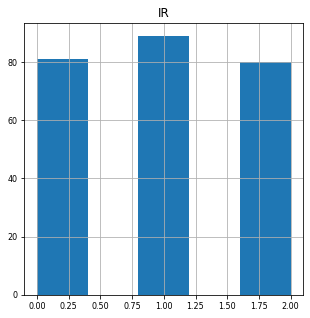

In [ ]:
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

In [ ]:
from sklearn.utils import shuffle

X = df.values[:,1:]
y = df.values[:,0]

X, y = shuffle(X, y)

## 1. Decison Tree



(200, 6)
(50, 6)
Training accuracy: 0.75
Testing accuracy: 0.64
              precision    recall  f1-score   support

           0       0.59      0.29      0.38        35
           1       0.00      0.00      0.00         2
           2       0.19      0.23      0.21        13

    accuracy                           0.26        50
   macro avg       0.26      0.17      0.20        50
weighted avg       0.46      0.26      0.32        50



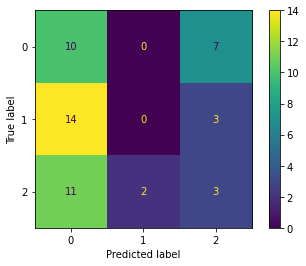

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
###Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X[:250], y[:250], test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

###Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

######Performace Measure
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred_train=clf.predict(X_train_std)
pred_test=clf.predict(X_test_std)
print("Training accuracy:", clf.score(X_train, y_train))
print("Testing accuracy:", clf.score(X_test, y_test))

####Classification report
from sklearn.metrics import classification_report
cpr=classification_report(pred_test,y_test)
print(cpr)

###Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
cp=plot_confusion_matrix(clf,X_test_std,y_test)

## 2. Random Forest

(200, 6)
(50, 6)
Training done
Training accuracy:  0.735
Test set accuracy:  0.66
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.00      0.00      0.00         3
           2       0.12      0.18      0.15        11

    accuracy                           0.28        50
   macro avg       0.28      0.17      0.20        50
weighted avg       0.54      0.28      0.36        50



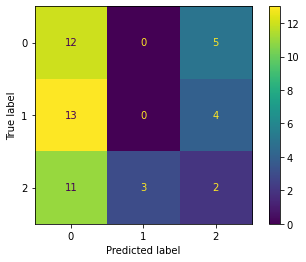

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:250], y[:250], test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

###Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)



#create a RandomForestClassifier with 5 estimators
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
pred_train=clf.predict(X_train_std)
pred_test=clf.predict(X_test_std)
print("Training done")
print("Training accuracy: ", clf.score(X_train, y_train))
print("Test set accuracy: ", clf.score(X_test, y_test))

####Classification report
from sklearn.metrics import classification_report
cpr=classification_report(pred_test,y_test)
print(cpr)

###Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
cp=plot_confusion_matrix(clf,X_test_std,y_test)



3.K Neighbours Classifier

(200, 6)
(50, 6)
Training done
Training accuracy:  0.675
Test set accuracy:  0.62
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        17
           1       0.29      0.62      0.40         8
           2       0.62      0.40      0.49        25

    accuracy                           0.46        50
   macro avg       0.46      0.50      0.45        50
weighted avg       0.52      0.46      0.47        50



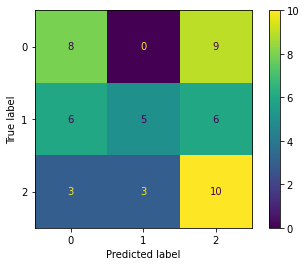

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:250], y[:250], test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

###Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)


clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)
pred_train=clf.predict(X_train_std)
pred_test=clf.predict(X_test_std)
print("Training done")
print("Training accuracy: ", clf.score(X_train, y_train))
print("Test set accuracy: ", clf.score(X_test, y_test))

####Classification report
from sklearn.metrics import classification_report
cpr=classification_report(pred_test,y_test)
print(cpr)



###Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
cp=plot_confusion_matrix(clf,X_test_std,y_test)


